## Imports and Setup

In [1]:
from helper_functions_wine import pd, os, shutil
from helper_functions_wine import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.23.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              9.3.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/csv/wine-cultivars.csv"
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cultivar                      178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoids                 178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect! Everything else will be plug and play!

In [6]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'cultivar'
df = add_id_column(df, classification_id) #changed function to deal with int values
df

,cultivar,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Id
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1-1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1-2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1-3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1-4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3-44
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3-45
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3-46
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3-47


In [18]:
# FIXME - get the correct values in the x and Y variables for your dataset
# As long as you have the correct value in `classification_id` from earlier, you shouldn't need any changes here unless there is another column you want to drop
# For instance, if you have an overfit feature such as a timestamp, you can drop it here
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (178, 13)
Y (178,)
This value should be True: True


## Image Generation

In [8]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]


In [9]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 178 samples to binary: 5.693114519119263 seconds. Seconds per sample = 0.031983789433254285


## Place Folders into the Correct Categories

In [10]:
organize_photos_in_folders(image_directory, Y)

178
{'1': 59, '2': 71, '3': 48}


In [11]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [12]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

In [19]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 64
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [20]:
#Changed values to tune for results
#In resnet.py -> get_callbacks() -> patiences to stop=35 & patience to reduce lr=25
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 144 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
3/3 [==============================] - 15s 3s/step - loss: 1.6345 - acc: 0.3542 - f1_m: 0.2920 - precision_m: 0.3339 - recall_m: 0.2604 - auc_3: 0.4989 - false_negatives_3: 109.0000 - false_positives_3: 72.0000 - true_negatives_3: 216.0000 - true_positives_3: 35.0000 - mean_absolute_error: 0.4436 - mean_squared_error: 0.2899 - val_loss: 71.5142 - val_acc: 0.2647 - val_f1_m: 0.2647 - val_precision_m: 0.2647 - val_recall_m: 0.2647 - val_auc_3: 0.4485 - val_false_negatives_3: 25.0000 - val_false_positives_3: 25.0000 - val_true_negatives_3: 43.0000 - val_true_positives_3: 9.0000 - val_mean_absolute_error: 0.4902 - val_mean_squared_error: 0.4902

Epoch 00001: val_acc improved from -inf to 0.26471, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2/results\fold0-resnet50v2-saved-model-01-val_acc-0.26.hdf5
Epoch 2/100
3/3 [==============================] - 0s 94ms/step - loss: 1.0582 - acc: 0.5208 - f1_m: 0.5135 - precision_

In [22]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.09219139143824577, 'acc': 0.9680555582046508, 'f1_m': 0.9723425149917603, 'precision_m': 0.9728174448013306, 'recall_m': 0.971874988079071, 'auc_3': 0.9986617565155029, 'false_negatives_3': 5.0, 'false_positives_3': 5.0, 'true_negatives_3': 283.0, 'true_positives_3': 139.0, 'mean_absolute_error': 0.041365073854103686, 'mean_squared_error': 0.016058562917169183, 'val_loss': 1038.2716552734375, 'val_acc': 0.29411765933036804, 'val_f1_m': 0.29411759972572327, 'val_precision_m': 0.29411765933036804, 'val_recall_m': 0.29411765933036804, 'val_auc_3': 0.4485294222831726, 'val_false_negatives_3': 25.0, 'val_false_positives_3': 25.0, 'val_true_negatives_3': 43.0, 'val_true_positives_3': 9.0, 'val_mean_absolute_error': 0.47058820724487305, 'val_mean_squared_error': 0.47058820724487305, 'lr': 0.001999999862164259}


In [23]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.2664354145526886, 'acc': 0.9097222089767456, 'f1_m': 0.9294209480285645, 'precision_m': 0.931795597076416, 'recall_m': 0.9270833134651184, 'auc_7': 0.978491485118866, 'false_negatives_7': 14.0, 'false_positives_7': 13.0, 'true_negatives_7': 275.0, 'true_positives_7': 130.0, 'mean_absolute_error': 0.11328557133674622, 'mean_squared_error': 0.04937306046485901, 'val_loss': 618.8463745117188, 'val_acc': 0.4117647111415863, 'val_f1_m': 0.41176465153694153, 'val_precision_m': 0.4117647111415863, 'val_recall_m': 0.4117647111415863, 'val_auc_7': 0.5588235259056091, 'val_false_negatives_7': 20.0, 'val_false_positives_7': 20.0, 'val_true_negatives_7': 48.0, 'val_true_positives_7': 14.0, 'val_mean_absolute_error': 0.39215683937072754, 'val_mean_squared_error': 0.39215683937072754, 'lr': 0.0019999999}


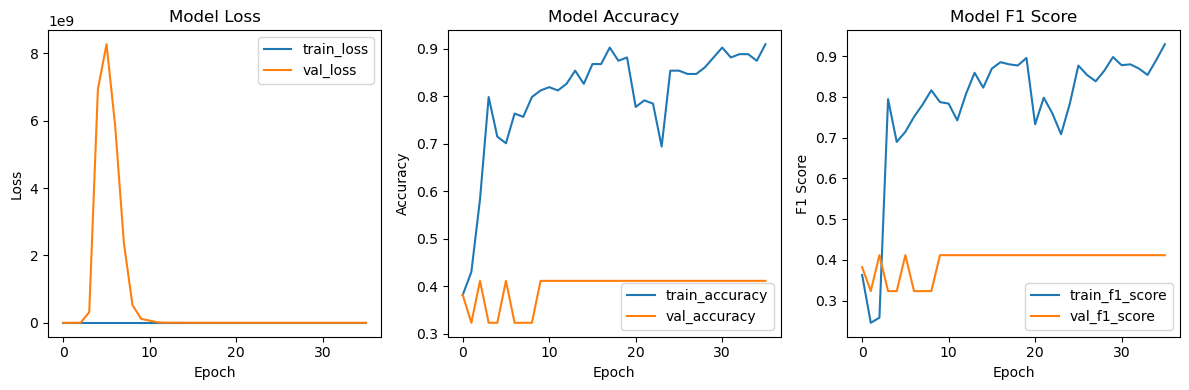

In [24]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [25]:
#FIXME - update the directories to point where you would like
image_directory = "C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2-correlated"
new_dir = image_directory + '/data/'

In [26]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: cultivar, 15, [1 2 3]


In [27]:
correlated_df = df.reindex(columns=correlated_order)

In [28]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (178, 13)
Y (178,)
This value should be True: True


In [29]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
#image_directory = "/mnt/sda1/image-results-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]


In [30]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 178 samples to binary: 5.673339605331421 seconds. Seconds per sample = 0.031872694411974274


In [31]:
organize_photos_in_folders(image_directory, Y)

178
{'1': 59, '2': 71, '3': 48}


In [32]:
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

Fold:  0
Found 144 images belonging to 3 classes.
Found 34 images belonging to 3 classes.


c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
c:\Users\darri\anaconda3\envs\cyber-research\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 1/100
3/3 [==============================] - 20s 6s/step - loss: 1.5260 - acc: 0.3194 - f1_m: 0.2399 - precision_m: 0.2828 - recall_m: 0.2083 - auc_8: 0.5349 - false_negatives_8: 110.0000 - false_positives_8: 73.0000 - true_negatives_8: 215.0000 - true_positives_8: 34.0000 - mean_absolute_error: 0.4342 - mean_squared_error: 0.2828 - val_loss: 209.4534 - val_acc: 0.4118 - val_f1_m: 0.4118 - val_precision_m: 0.4118 - val_recall_m: 0.4118 - val_auc_8: 0.5588 - val_false_negatives_8: 20.0000 - val_false_positives_8: 20.0000 - val_true_negatives_8: 48.0000 - val_true_positives_8: 14.0000 - val_mean_absolute_error: 0.3922 - val_mean_squared_error: 0.3922

Epoch 00001: val_acc improved from -inf to 0.41176, saving model to C:/Users/darri/CMU/cyber-research/BinaryImageTransformation/data/images/image-results-wine2-correlated/results\fold0-resnet50v2-saved-model-01-val_acc-0.41.hdf5
Epoch 2/100
3/3 [==============================] - 1s 92ms/step - loss: 1.1879 - acc: 0.5625 - f1_m: 0.5530

In [33]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.07399270907044411, 'acc': 0.981944465637207, 'f1_m': 0.9796669960021973, 'precision_m': 0.9801752805709839, 'recall_m': 0.9791666746139527, 'auc_8': 0.9965880513191223, 'false_negatives_8': 4.0, 'false_positives_8': 3.0, 'true_negatives_8': 285.0, 'true_positives_8': 140.0, 'mean_absolute_error': 0.0279268279671669, 'mean_squared_error': 0.01159841837361455, 'val_loss': 6699.843756866455, 'val_acc': 0.3470588386058807, 'val_f1_m': 0.34705877900123594, 'val_precision_m': 0.3470588386058807, 'val_recall_m': 0.3470588386058807, 'val_auc_8': 0.4485294222831726, 'val_false_negatives_8': 25.0, 'val_false_positives_8': 25.0, 'val_true_negatives_8': 43.0, 'val_true_positives_8': 9.0, 'val_mean_absolute_error': 0.4353295624256134, 'val_mean_squared_error': 0.4352944254875183, 'lr': 0.001999999862164259}


In [34]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0489552840590477, 'acc': 0.9930555820465088, 'f1_m': 0.9947916865348816, 'precision_m': 0.9947916865348816, 'recall_m': 0.9947916865348816, 'auc_10': 0.9999759793281555, 'false_negatives_10': 1.0, 'false_positives_10': 1.0, 'true_negatives_10': 287.0, 'true_positives_10': 143.0, 'mean_absolute_error': 0.027757907286286354, 'mean_squared_error': 0.007233153562992811, 'val_loss': 37.913333892822266, 'val_acc': 0.529411792755127, 'val_f1_m': 0.5294117331504822, 'val_precision_m': 0.529411792755127, 'val_recall_m': 0.529411792755127, 'val_auc_10': 0.6401383876800537, 'val_false_negatives_10': 16.0, 'val_false_positives_10': 16.0, 'val_true_negatives_10': 52.0, 'val_true_positives_10': 18.0, 'val_mean_absolute_error': 0.3139028251171112, 'val_mean_squared_error': 0.31372714042663574, 'lr': 0.0019999999}


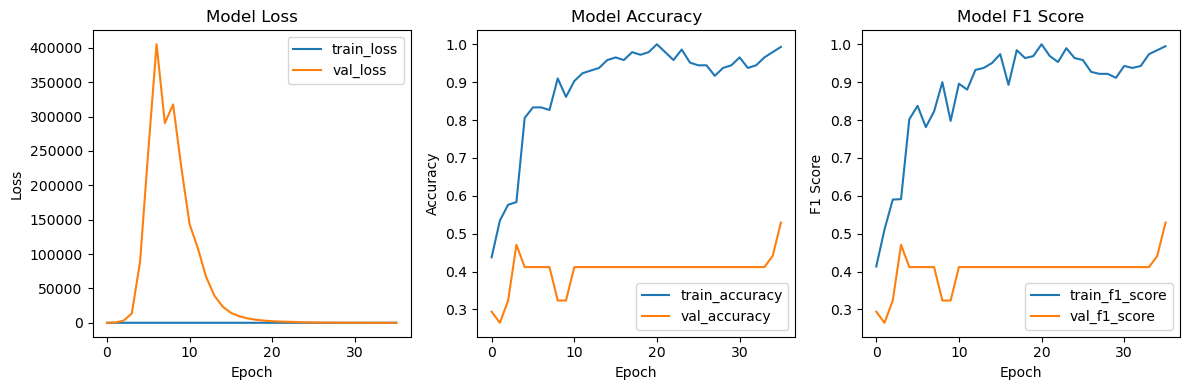

In [35]:
plot_metrics(best_model.history)

# TEST (to be implemented)